In [2]:
import pandas as pd
import numpy as np
import math
import time

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('melbourne_property_data/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [4]:
PRICE = 'Price'
DISTANCE_2_CBD = 'Distance' # Distance to Melbourne CBD
REGION = 'Regionname'       # General Region
N_ROOMS = 'Rooms'           
TYPE = 'Type'               # Housing type
SUBURB = 'Suburb'
SELLER = 'SellerG'          # Seller Agent Company
N_PRPOERTY = 'Propertycount'
DATE = 'Date'               # Date Sold
METHOD = 'Method'

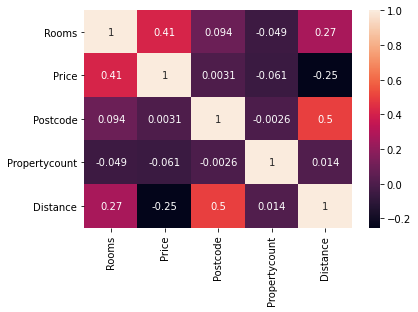

In [5]:
sns.heatmap(df.corr(), annot = True)
plt.show()

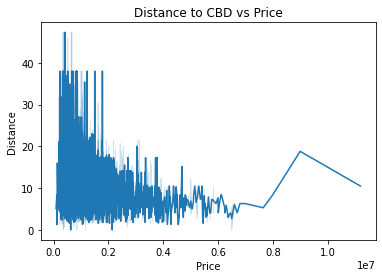

In [6]:
sns.lineplot(x=df[PRICE], y=df[DISTANCE_2_CBD])
plt.title("Distance to CBD vs Price")
plt.show()

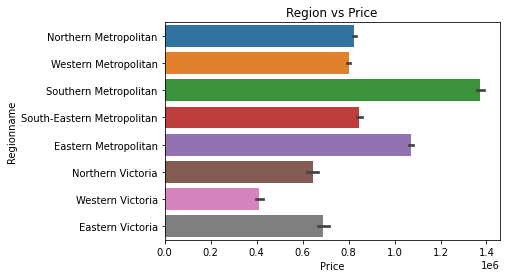

In [7]:
sns.barplot(x=df[PRICE], y=df[REGION])
plt.title("Region vs Price")
plt.show()

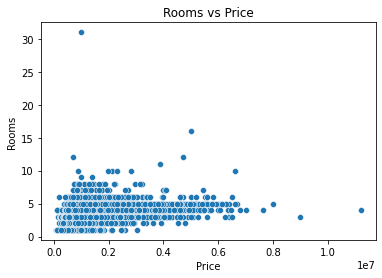

In [12]:
sns.scatterplot(x=df[PRICE], y=df[N_ROOMS])
plt.title("Rooms vs Price")
plt.show()

In [20]:
# Remove all NaN in Price
df = df.dropna(subset = [PRICE])

In [45]:
# There might be an error in 55467
df = df.drop(55467)

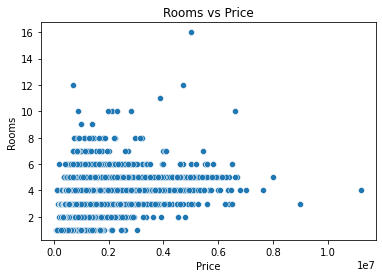

In [46]:
sns.scatterplot(x=df[PRICE], y=df[N_ROOMS])
plt.title("Rooms vs Price")
plt.show()

In [36]:
# Find average price per room
df['price/room'] = df[PRICE] / df[N_ROOMS]
df['price/room'].describe()

count    4.843300e+04
mean     3.326746e+05
std      1.682321e+05
min      3.166667e+04
25%      2.190000e+05
50%      2.963750e+05
75%      4.026667e+05
max      3.050000e+06
Name: price/room, dtype: float64

In [37]:
price_per_room = df[PRICE].sum() / df[N_ROOMS].sum()
price_per_room

324871.9871613901

In [42]:
# Remove anomalies where price per room is less than $100000
anomaly = df[df['price/room'] < 4.0e+04]
anomaly

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,price/room
6410,Melton West,52 Chelmsford Wy,6,h,190000.0,S,Ryder,4/03/2017,3337,Northern Victoria,6065,31.7,Melton City Council,31666.666667
6891,Coburg,171 Moreland Rd,4,h,145000.0,PI,Jellis,4/06/2016,3058,Northern Metropolitan,11204,6.7,Darebin City Council,36250.000000
50347,Caulfield,30 Pyne St,4,h,131000.0,PI,Rodney,25/02/2017,3162,Southern Metropolitan,2379,8.7,Glen Eira City Council,32750.000000
53274,Highett,18a Barnet St,4,h,132500.0,PI,Chisholm,26/07/2016,3190,Southern Metropolitan,4794,16.0,Bayside City Council,33125.000000
55467,Wantirna South,5 Cottswold Pl,31,h,990000.0,S,Justin,27/06/2016,3152,Eastern Metropolitan,7082,14.7,Knox City Council,31935.483871


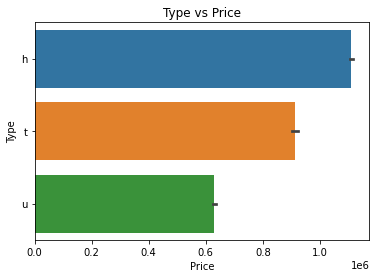

In [50]:
sns.barplot(x=df[PRICE], y=df[TYPE])
plt.title("Type vs Price")
plt.show()